This notebook aims to illustrate the choas behavior for double pendulum

Programmed by Zhiyuan Guo

Late update Date 4/26/2019



The Lagrangian for double pendulum is given by

$\begin{equation}
    \mathcal{L} = \frac{1}{2}(m_1+m_2)l_1^2\dot \theta_1^2 + \frac{1}{2}m_2l_2^2\dot \theta_2^2 + m_1l_1l_2\dot\theta_1^2\dot\theta_2^2cos(\theta_1-\theta_2)+(m_1+m_2)l_1gcos\theta+m_2gl_2cos\theta_2
\end{equation}$

From Euler-Lagrangian equation

$\begin{equation}
    \frac{d}{dt}\left(\frac{\partial\mathcal{L}}{\partial\dot q_i}\right) - \frac{\partial\mathcal{L}}{\partial q} = 0    
\end{equation}$
with $q_i = \theta_1,\theta_2$

We get:


$\begin{equation}
    (m_1+m_2)l_1 \ddot \theta_1+m_2l_2\ddot\theta_2cos(\theta_1-\theta_2)+m_2l_2\dot\theta_2^2sin(\theta_1-\theta_2)+(m_1+m_2)gsin\theta_1 = 0
\end{equation}$

and 

$\begin{equation}
    m_2l_2 \ddot \theta_2+m_2l_2\ddot\theta_2cos(\theta_1-\theta_2)-m_2l_1\dot\theta_1^2sin(\theta_1-\theta_2)+m_2gsin\theta_2 = 0
\end{equation}$

If we set $z_1 = \dot\theta_1$ and $z_1 = \dot\theta_2$

$\begin{equation}
    \dot z_1 = \frac{m_2gsin\theta_2cos(\theta_1-\theta_2)-m_2sin(\theta_1-\theta_2)\left[l_1z_1^2cos(\theta_1-\theta_2)+l_2z_2^2\right]-(m_1+m_2)gsin\theta_1}{l_1\left[m_1+m_2sin^2(\theta_1-\theta_2)\right]}
\end{equation}$

$\begin{equation}
    \dot z_2 = \frac{(m_1+m_2)\left[l_1z_1^2sin(\theta_1-\theta_2)-gsin\theta_2+gsin\theta_1cos(\theta_1-\theta_2)\right]+m_2l_2z_2^2sin(\theta_1-\theta_2)cos(\theta_1-\theta_2)}{l_2\left[m_1+m_2sin^2(\theta_1-\theta_2)\right]}
\end{equation}$

In [1]:
from matplotlib import animation, rc
from IPython.display import HTML

In [2]:
import sys
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from scipy.integrate import odeint, solve_ivp

In [13]:
class LagrangianPendulum():
    """
    Pendulum class implements the parameters and Lagrange's equations for 
     double pendulum.
     
    Parameters
    ----------
    L1,L2 : float
        length of the twp  pendulum
    g : float
        gravitational acceleration at the earth's surface

    m1,m2 : float
        mass of the two pendulum

    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
        Implement z1_dot and z2_dot equation above
    """
    def __init__(self, L1=1.,L2 = 1.,m1 = 1.,m2 = 1., g=1.):
        self.L1 = L1
        self.L2 = L2
        self.m1 = m1
        self.m2 = m2
        self.g = g

    
    def dy_dt(self, t, y):
        """Return the first derivatives of y = theta1, z1, theta2, z2."""
        
        theta1, z1, theta2, z2 = y
        c, s = np.cos(theta1-theta2), np.sin(theta1-theta2)
        
        theta1dot = z1
        z1dot = (self.m2*g*np.sin(theta2)*c - self.m2*s*(self.L1*z1**2*c + self.L2*z2**2) -
                 (self.m1+self.m2)*self.g*np.sin(theta1)) / self.L1 / (self.m1 + self.m2*s**2)
        theta2dot = z2
        z2dot = ((self.m1+self.m2)*(self.L1*z1**2*s - self.g*np.sin(theta2) + self.g*np.sin(theta1)*c) + 
                 self.m2*self.L2*z2**2*s*c) / self.L2 / (self.m1 + self.m2*s**2)
        
        return [z1, z1dot, z2, z2dot]
    
    def solve_ode(self, t_pts, theta1_0, theta_dot1_0,theta2_0, theta_dot2_0,
                  abserr=1.0e-9, relerr=1.0e-9):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [theta1_0,theta1_dot_0,theta2_0,theta2_dot_0]
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        #theta1, theta1_dot,theta1, theta1_dot = solution

        return solution.y

In [4]:
# Pendulum rod lengths (m), bob masses (kg).
L1, L2 = 1, 1
m1, m2 = 1, 1
# The gravitational acceleration (m.s-2).
g = 1

#First pendulum
p1 = LagrangianPendulum(L1,L2 ,m1,m2 , g)

#second pendulum for comparision to show chaos
p2 = LagrangianPendulum(L1,L2 ,m1,m2 , g)

### To see choas, setting initial condition beyond region for small angle approximation

### I add another double pendulum start will slightly different initial condition from the first one for comparison

In [5]:
# Maximum time, time point spacings and the time grid (all in s).
tmax, dt = 300, 0.3
t_pts = np.arange(0, tmax+dt, dt)

# Initial conditions: theta1, dtheta1/dt, theta2, dtheta2/dt.
y0 = np.array([4/7*np.pi, 0.1, 1/3*np.pi, 0.3])

# Initial condition for second pendulum
y0_1 = np.array([3.999/7*np.pi, 0.0999, 0.9999/3*np.pi, 0.3])
theta1_0 = y0[0]
theta1_dot_0 = y0[1]
theta2_0 = y0[2]
theta2_dot_0 = y0[3]

# Solve for double pendulum motion

#first pendulum
y = p1.solve_ode(t_pts,theta1_0,theta1_dot_0 ,theta2_0 ,theta2_dot_0 )

#second pendulum
y2 = p2.solve_ode(t_pts,y0_1[0],y0_1[1],y0_1[2],y0_1[3])

#extract change in angle of the double pendulum from solution
theta1, theta2 = y[0], y[2]
theta1_2,theta2_2 = y2[0],y2[2]

## From the angle versus time figure below, we can see that the two double pendulum behave similarly at the very begining, then their behavior totally differs from each other

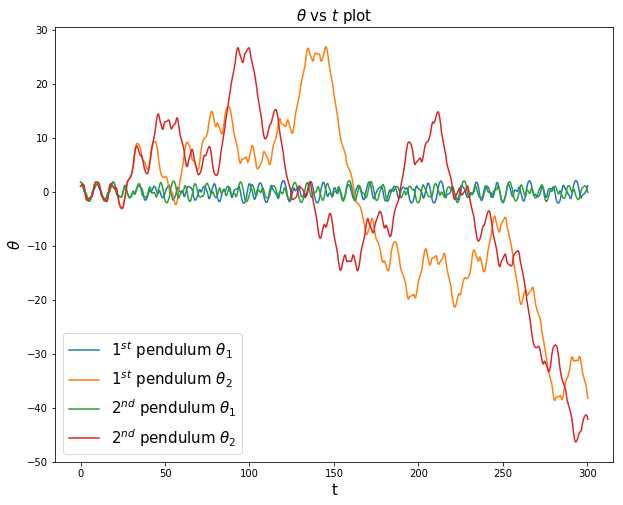

In [12]:
plt.figure(figsize = (10,8))
plt.title(r'$\theta$ vs $t$ plot',fontsize = 15)
plt.plot(t_pts,theta1,label = r'$1^{st}$ pendulum $\theta_1$')
plt.plot(t_pts,theta2,label = r'$1^{st}$ pendulum $\theta_2$')
plt.plot(t_pts,theta1_2,label = r'$2^{nd}$ pendulum $\theta_1$')
plt.plot(t_pts,theta2_2,label = r'$2^{nd}$ pendulum $\theta_2$')
plt.xlabel('t',fontsize = 15)
plt.ylabel(r'$\theta$',fontsize = 15)
plt.legend(loc = 'best',fontsize = 15);

## Start doing animation

In [7]:
#Convert angle to x,y position in cartesian coordinates for animation

#position for 1st double pendulum
x1 = L1 * np.sin(theta1)
y1 = -L1 * np.cos(theta1)
x2 = x1 + L2 * np.sin(theta2)
y2 = y1 - L2 * np.cos(theta2)

#position for 2nd double pendulum
x1_2 = L1 * np.sin(theta1_2 )
y1_2 = -L1 * np.cos(theta1_2 )
x2_2 = x1_2  + L2 * np.sin(theta2_2 )
y2_2 = y1_2  - L2 * np.cos(theta2_2 )

In [8]:
%%capture
#Initialize animation plot
fig_anim = plt.figure(figsize=(6,6))
ax_anim = fig_anim.add_subplot(1,1,1)

# First double pendulum
# 'rod' connecting first point to the hanging point
ln1_anim, = ax_anim.plot([0,x1[0]],[0,y1[0]],color = 'blue',lw = 3)

# 'rod' connecting 1st pendulum to 2nd pendulum
ln2_anim, = ax_anim.plot([x1[0],x2[0]],[y1[0],y2[0]],color = 'orange',lw = 3)

# Initial position of 1st pedulum
pt1_anim, = ax_anim.plot(x1[0],y1[0],'o',label = 'm1')

# Initial position of 2nd pendulum
pt2_anim, = ax_anim.plot(x2[0],y2[0],'o',label = 'm2')

# Same things for the second  double pendulum

ln2_anim_2, = ax_anim.plot([0,x1_2[0]],[0,y1_2[0]],color = 'blue',lw = 3)

ln1_anim_2, = ax_anim.plot([x1_2[0],x2_2[0]],[y1_2[0],y2_2[0]],color = 'orange',lw = 3)

pt1_anim_2, = ax_anim.plot(x1_2[0],y1_2[0],'o',label = 'm1_2')

pt2_anim_2, = ax_anim.plot(x2_2[0],y2_2[0],'o',label = 'm2_2')

plt.legend(loc = 'best',fontsize = 15)
plt.xlabel('$x$',fontsize = 15)
plt.ylabel('$y$', fontsize = 15)
plt.xlim(-3,3)
plt.ylim(-3,3)

In [9]:
def animate_wave(i):
    """This is the function called by FuncAnimation to create each frame,
        numbered by i.  So each i corresponds to a point in the t_pts
        array, with index i.
    """
    ln1_anim.set_data([0,x1[i]],[0,y1[i]])
    ln2_anim.set_data([x1[i],x2[i]],[y1[i],y2[i]])
    pt1_anim.set_data(x1[i], y1[i])  # overwrite line_anim with new points
    pt2_anim.set_data(x2[i], y2[i])
    
    ln2_anim_2.set_data([0,x1_2[i]],[0,y1_2[i]])
    ln1_anim_2.set_data([x1_2[i],x2_2[i]],[y1_2[i],y2_2[i]])
    pt1_anim_2.set_data(x1_2[i], y1_2[i])  # overwrite line_anim with new points
    pt2_anim_2.set_data(x2_2[i], y2_2[i])
    
    return (pt1_anim,pt2_anim,pt1_anim_2,pt2_anim_2)   # this is needed for blit=True to work

In [10]:
frame_interval = 60.  # time between frames
frame_number = 300    # number of frames to include (index of t_pts)
anim = animation.FuncAnimation(fig_anim, 
                               animate_wave, 
                               init_func=None,
                               frames=frame_number, 
                               interval=frame_interval, 
                               blit=True,
                               repeat=False)

#fig.show()

## Here, the animation helps to illustrate the point we made when commenting angle vs time plot above

In [11]:
HTML(anim.to_jshtml())